## Weekly Assignment 6

### Brandon Owens and Loan Pham


### Q. 1  

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [253]:
# Import the dataset “iowa_housing.csv”. The dataset is about housing prices in Ames, Iowa
# You are going to predict sale price.
df = pd.read_csv("iowa_housing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [254]:
# (a)	Show the head and shape of the dataframe. Drop “Id” in the dataset.
df_drop = df.drop(["Id"], axis=1)
df_drop.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [255]:
df_drop.shape

(1460, 80)

In [256]:
# (b)	Use the dataset to:
# (i)	create a correlation matrix (df.corr()), and then draw the heatmap on the correlation matrix.
corr = df_drop.corr()
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


<AxesSubplot:>

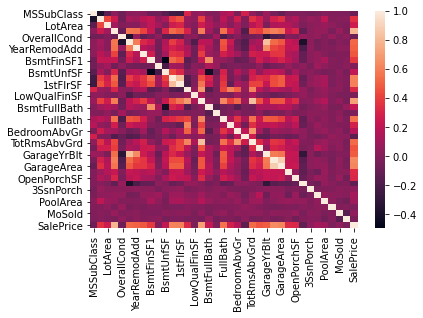

In [257]:
sns.heatmap(corr)

<AxesSubplot:>

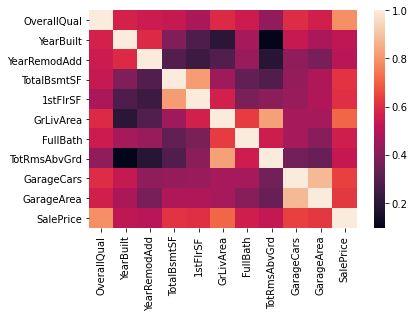

In [258]:
# (ii)	Find the features that the absolute value of correlation with “SalePrice” > 0.5. 
# Then, draw the heatmap of correlation on those features.
features_abs = corr[abs((corr.SalePrice)>=.5)].SalePrice.keys()
abs_corr = corr.loc[features_abs,features_abs]
sns.heatmap(abs_corr)

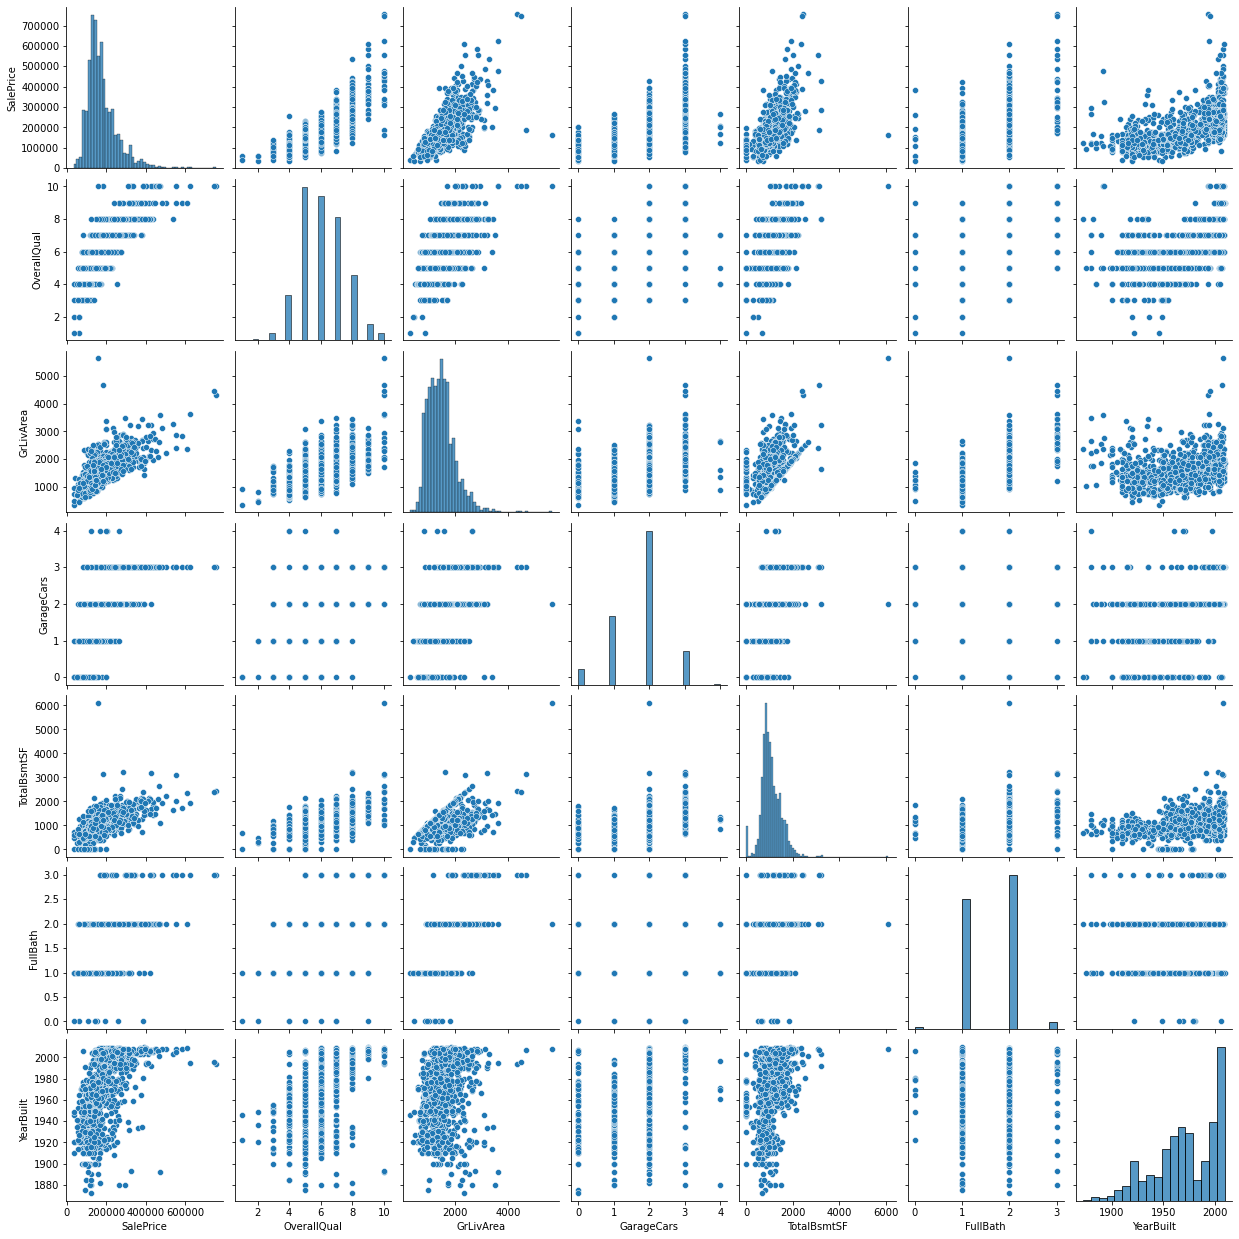

In [259]:
# (iii)	create pair plots on the following features 
sns.pairplot(df_drop, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])

In [260]:
# (iv)	Find the most important feature relative to the “SalePrice” based on absolute value of correlation coefficient.
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice.head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

C:\Users\12069\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

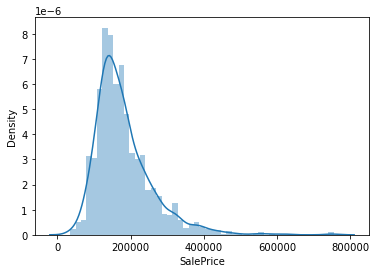

In [261]:
# (v)	create a distribution plot on “SalePrice”
sns.distplot(df_drop['SalePrice'], kde =True)

In [262]:
# (vi)	For all the numerical features except “SalePrice”,
# replace all the missing values of numerical features with the median value of each feature.
temp=pd.DataFrame()
temp['SalePrice'] = df['SalePrice']
num_cols = df.select_dtypes(exclude = ['object']).columns
num_cols = num_cols.drop('SalePrice')
med_replace = df[num_cols]
med_replace = med_replace.fillna(med_replace.median())
med_replace

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [263]:
# (vii)	Create dummies for all categorical features. 
# The final shape of dataset should be (1460, 246) (set drop_first = True)
dummies_cols = df.select_dtypes(include = ['object']).columns
new_housing = df[dummies_cols]
new_housing = pd.get_dummies(new_housing, drop_first = True)
new_housing.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [264]:
newdf_housing = pd.concat([temp, med_replace, new_housing], axis =1)
newdf_housing.shape

(1460, 247)

In [265]:
newdf_housing['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [266]:
#  (c) Then, do the modelling:

In [267]:
# (i)	Check for any missing values again.
newdf_housing.isnull().any()

SalePrice                False
Id                       False
MSSubClass               False
LotFrontage              False
LotArea                  False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 247, dtype: bool

In [268]:
# (ii)	create y  = “SalePrice”. Drop y from the dataframe.
y = "SalePrice"
house_temp = newdf_housing.drop([y], axis =1)
house_temp.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [269]:
# (iii)	Split the dataset into train and test.

X_train, X_test, y_train, y_test = train_test_split(house_temp,newdf_housing, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 246)
X_test : (438, 246)
y_train : (1022, 247)
y_test : (438, 247)


In [317]:
# (iv)	Train a linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Predicted vs. Actual Values ')

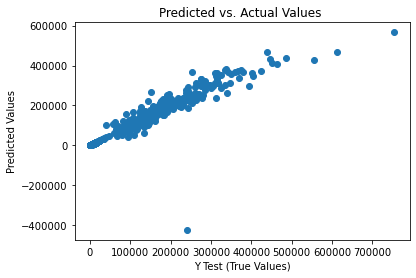

In [271]:
# (v)	predict “SalePrice” with the test data.
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values ')

In [272]:
# (vi)	find the root mean squared error of the model on the test data.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error = ", rmse)
print("The range of temperature = ",y_test.min(), y_test.max())

Root Mean Squared Error =  2681.095581919924
The range of temperature =  SalePrice                35311.0
Id                          11.0
MSSubClass                  20.0
LotFrontage                 21.0
LotArea                   1491.0
                          ...   
SaleCondition_AdjLand        0.0
SaleCondition_Alloca         0.0
SaleCondition_Family         0.0
SaleCondition_Normal         0.0
SaleCondition_Partial        0.0
Length: 247, dtype: float64 SalePrice                755000.0
Id                         1455.0
MSSubClass                  190.0
LotFrontage                 174.0
LotArea                   70761.0
                           ...   
SaleCondition_AdjLand         0.0
SaleCondition_Alloca          1.0
SaleCondition_Family          1.0
SaleCondition_Normal          1.0
SaleCondition_Partial         1.0
Length: 247, dtype: float64


### Q2

In [273]:
# (a)	Read in the dataset 'online_shoppers_intention.csv'
df_shoppers = pd.read_csv('online_shoppers_intention.csv')
df_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:>

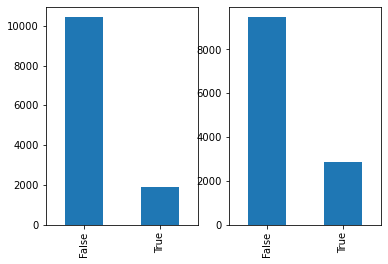

In [274]:
# (b)	Count how many shoppers buy, i.e. “Revenue”==True.
# Count how many shoppers browse in the weekends, i.e. “Weekends”==True. Create the following plot.
fig, ax =plt.subplots(1,2)
df_shoppers['Revenue'].value_counts().plot.bar(ax=ax[0])
df_shoppers['Weekend'].value_counts().plot.bar(ax=ax[1])

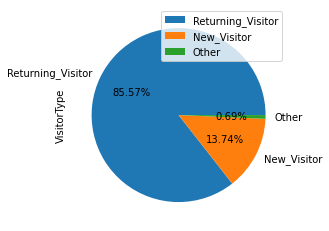

In [275]:
# (c)	Create the following plot, which shows the proportions of various kinds of visitors.
# (first, use value counts, and then use  .plot.pie(autopct = '%.2f%%')
df_shoppers['VisitorType'].value_counts().plot.pie(autopct = '%.2f%%')
plt.legend()

<AxesSubplot:>

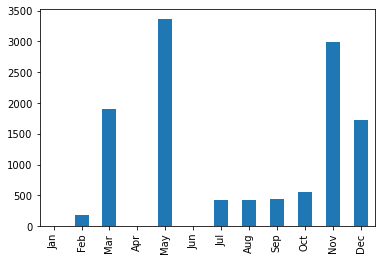

In [276]:
# (d)	Check the month with most shoppers visiting the online shopping sites. Create the following bar plot.
months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
new_df = df_shoppers['Month'].value_counts()
new_df = new_df.reindex(months)
new_df.plot.bar()

In [277]:
# (e)	For all the numerical variables, fill the missing values with the median of that numerical variable.
num_features = df_shoppers.select_dtypes(exclude = ["object"]).columns
num_shoppers = df_shoppers[num_features]
num_shoppers = num_shoppers.fillna(num_shoppers.median())
num_shoppers 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False


In [278]:
# (f)	Create dummies for categorical variables.

cate_vari = df_shoppers.select_dtypes(include = ["object"]).columns
shop_cat = df_shoppers[cate_vari]
shop_cat = pd.get_dummies(shop_cat,drop_first = True)
shop_cat.head()

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1


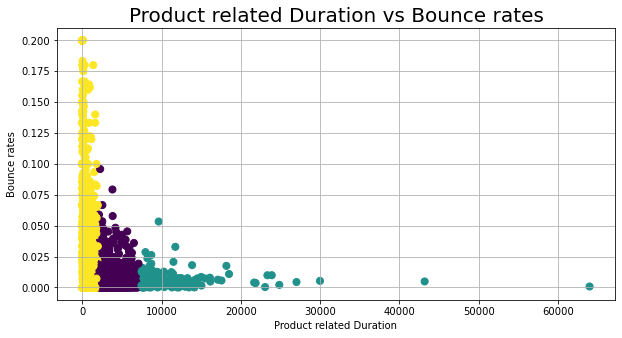

In [279]:
# (g)	Use KMeans to group customers into 3 clusters. That is unsupervised learning. Create the following plot.

kmeans = KMeans(n_clusters=3)
kmeans.fit(num_shoppers)
y_kmeans = kmeans.predict(num_shoppers)
plt.figure(figsize=(10,5))
plt.title('Product related Duration vs Bounce rates', fontsize = 20)
plt.grid()
plt.xlabel('Product related Duration')
plt.ylabel('Bounce rates')
plt.scatter(df_shoppers["ProductRelated_Duration"], df_shoppers["BounceRates"], c=y_kmeans, s=50, cmap='viridis')

In [280]:
# (h)	Set y = “Revenue” and X is the dataframe without “Revenue”. 
numerical_cols = df_shoppers.select_dtypes(exclude = ["number"]).columns
shop_nums = df_shoppers[numerical_cols]
df_dummies = pd.get_dummies(shop_nums, drop_first=True)
y = df_dummies["Revenue"]
X = df_dummies.drop("Revenue", axis=1)
df_dummies.isnull().any()

Weekend                          False
Revenue                          False
Month_Dec                        False
Month_Feb                        False
Month_Jul                        False
Month_June                       False
Month_Mar                        False
Month_May                        False
Month_Nov                        False
Month_Oct                        False
Month_Sep                        False
VisitorType_Other                False
VisitorType_Returning_Visitor    False
dtype: bool

In [281]:
# (i)	Split the dataset into train and test sets. 
# Train a support vector machine classifier model. Use kernel = “rbf” and class_weight='balanced'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [282]:
# (j)	Predict which online shopper will do a purchase. Find the accuracy score.
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6387318751536004

### Q3

In [288]:
# (a)	Load the dataset.
from sklearn.datasets import fetch_olivetti_faces
face= fetch_olivetti_faces()
faces = fetch_olivetti_faces().images

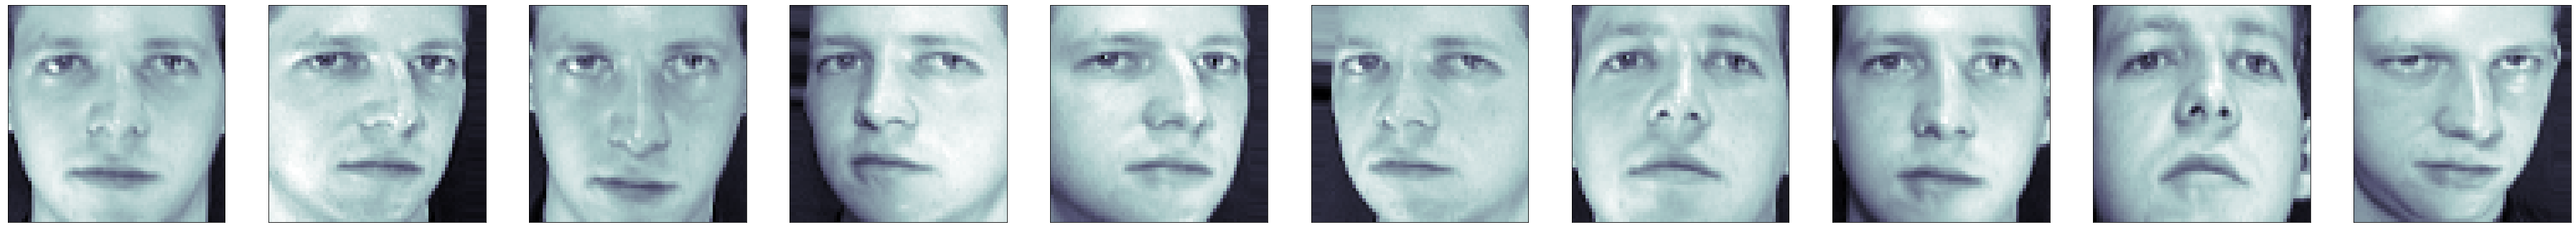

In [296]:
# (b)	Show the first 10 images
fig, ax = plt.subplots(1, 10, figsize=(64, 64))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces[i], cmap=plt.cm.bone)
    axi.set(xticks=[], yticks=[])

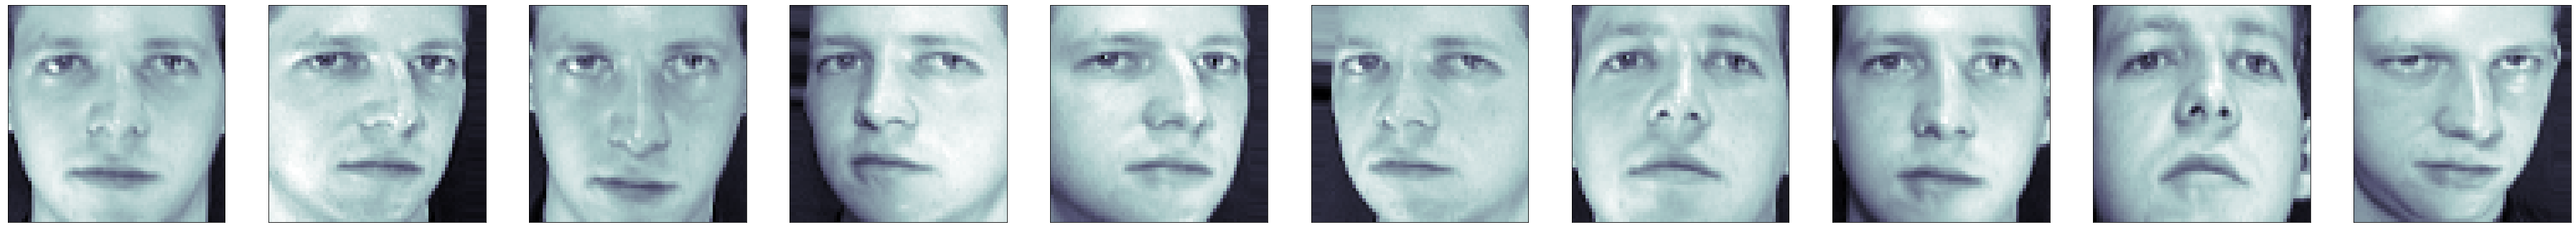

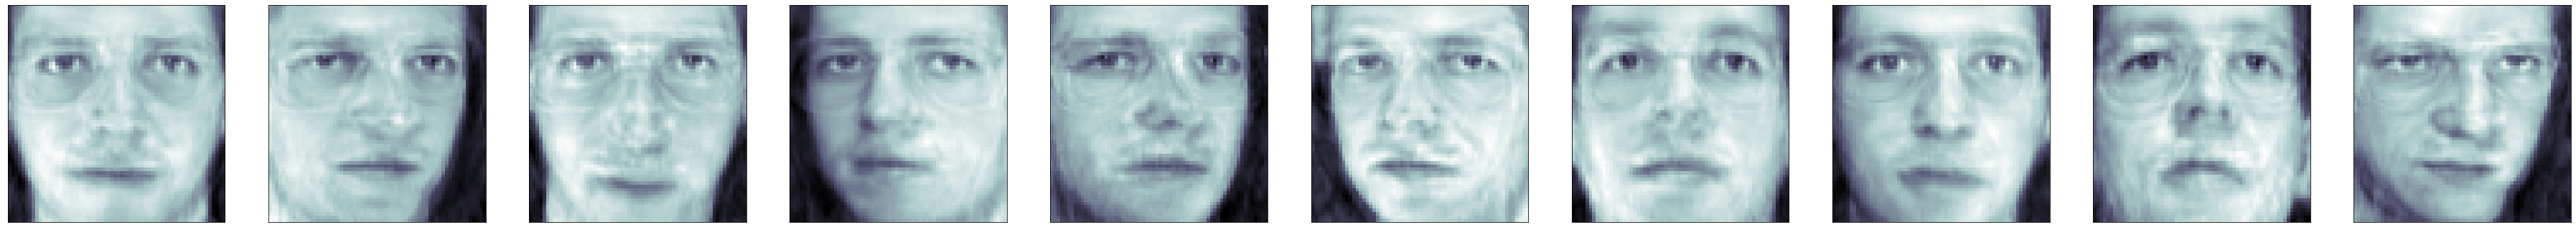

In [297]:
# (c)	Size of each image is 64x64. Use PCA to reduce it into 90 features. 
# For the first row, show the first 10 original images. 
# Then for the second row, show the first 10 images with reduced number of features.
x = face.data
y = face.target
pca = PCA(n_components = 90)
pca.fit(x)
transformed_data = pca.fit_transform(x)
x_approx = pca.inverse_transform(transformed_data)
x_approx_img = x_approx.reshape(400,64,64)

fig, ax = plt.subplots(1, 10, figsize=(64, 64))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces[i], cmap=plt.cm.bone)
    axi.set(xticks=[], yticks=[])

fig, ax = plt.subplots(1, 10, figsize=(64, 64))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_approx_img[i] , cmap = plt.cm.bone)
    axi.set(xticks=[], yticks=[])

In [318]:
# (d)	Using images of reduced features to conduct the machine learning task.
# (i)	Split the dataset into train and test.

X_train, X_test, y_train, y_test = train_test_split(face.data,face.target, random_state=0)

In [308]:
pca = PCA(n_components=90)
pca.fit(X_train)

PCA(n_components=90)

In [320]:
# (ii)	Train a Random Forest Classifier model. Set n_estimators=100. Predict the target of the images in test set.

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [312]:
# (iii)	Find the accuracy score.
accuracy_score(y_test,y_pred)

0.93

In [315]:
# (iv)	Create a confusion matrix, and put it in a heatmap. (Your heatmap may look different due to the randomization in random forest classifier)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

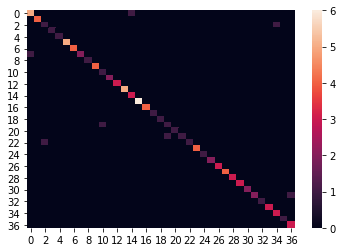

In [316]:
sns.heatmap(cm)